/tmp/ipykernel_830156/1574771821.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, j].set_yticklabels(axes[i, j].get_yticks().round(4), size=12)
/tmp/ipykernel_830156/1574771821.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, j].set_xticklabels(axes[i, j].get_xticks().round(2), size=12)
/tmp/ipykernel_830156/1574771821.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, j].set_yticklabels(axes[i, j].get_yticks().round(4), size=12)
/tmp/ipykernel_830156/1574771821.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, j].set_xticklabels(axes[i, j].get_xticks().round(2), size=12)
/tmp/ipykernel_830156/1574771821.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, j].set_yticklabels(axes[i, j].get_yticks().round(4), size=12)
/tmp/ipykernel_830156/1574771821.py:48: UserWarning: FixedFormatt

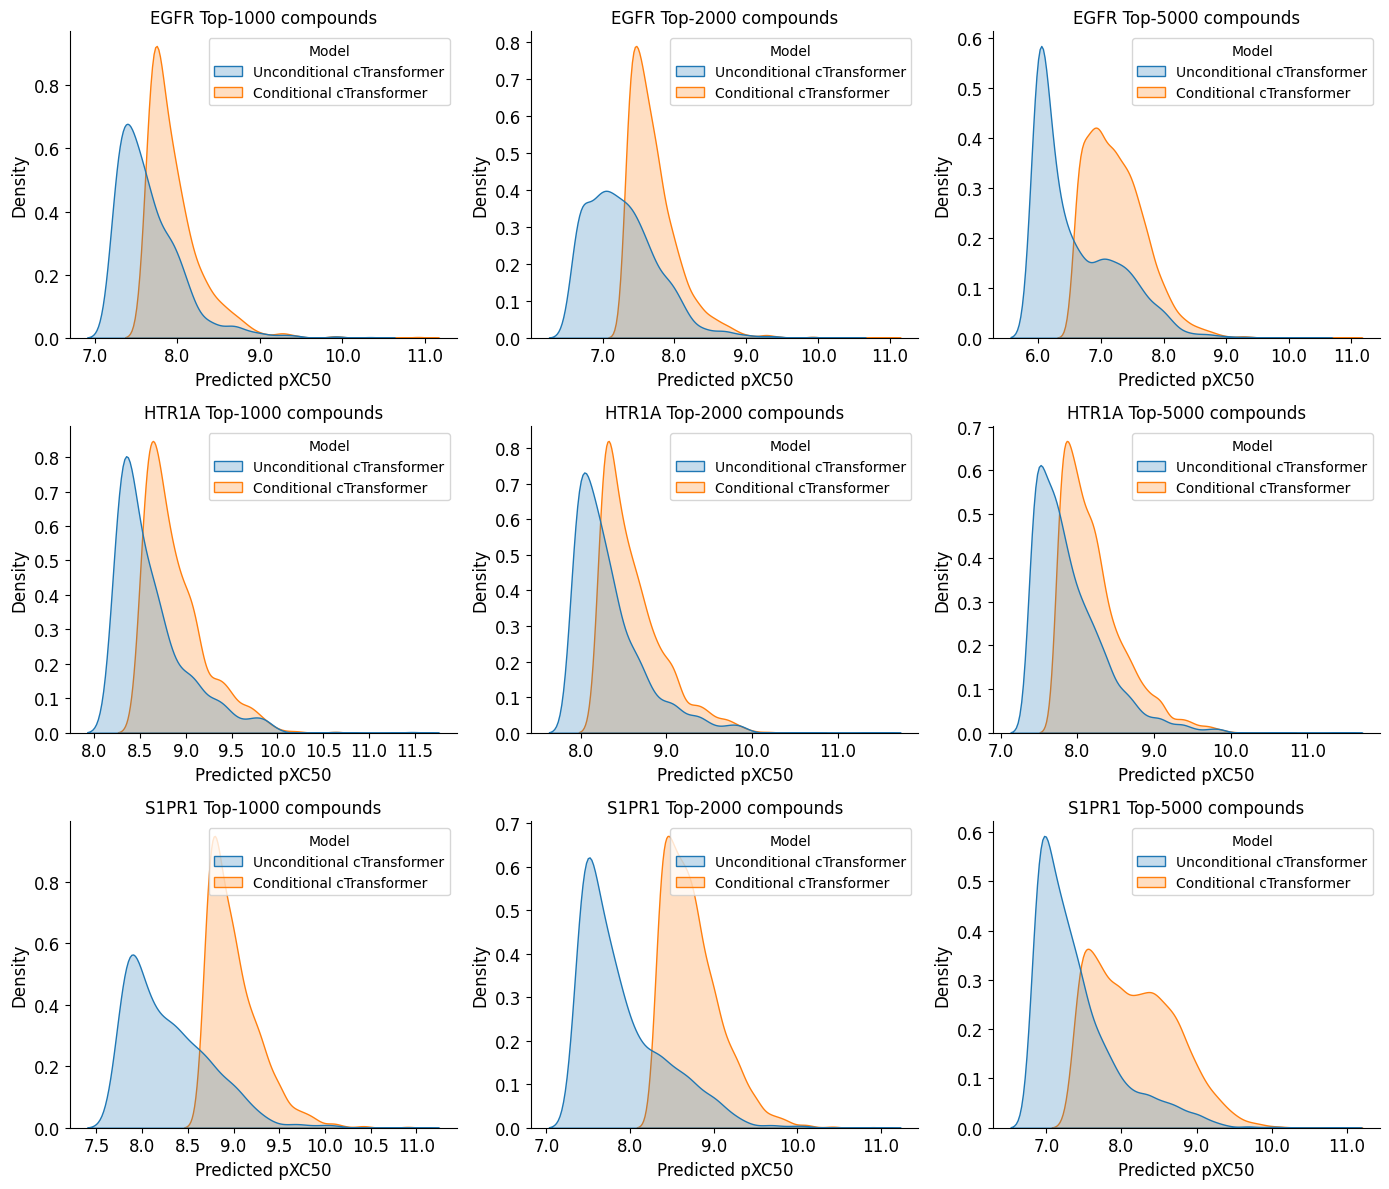

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
pal=list(sns.color_palette("tab10"))

fig, axes = plt.subplots(3, 3, figsize=(14, 12))

names = [
    # 'Unconditional',
    'EGFR',
    'HTR1A',
    'S1PR1'
]

num = [
    1000,
    2000,
    5000
]

for i, name in enumerate(names):
    for j, n in enumerate(num):
        # rnn = pd.DataFrame({'pred_pXC50':np.load('./npy/y/{}_RNN_Y.npy'.format(name))}).sort_values(by=['pred_pXC50'],ascending=False).head(n)
        # rnn['Model']='cRNN'

        unconditional = pd.DataFrame({
            'pred_pXC50': np.load('../generated_molecules/npy/{}_Unconditional_Y.npy'.format(name))
        }).sort_values(by=['pred_pXC50'],ascending=False).head(n)
        unconditional['Model']='Unconditional cTransformer'

        trans = pd.DataFrame(
            {'pred_pXC50':np.load('../generated_molecules/npy/{}_Conditional_Y.npy'.format(name))}
        ).sort_values(by=['pred_pXC50'],ascending=False).head(n)
        trans['Model']='Conditional cTransformer'

        df = pd.concat([unconditional, trans]).reset_index()
        sns.kdeplot(data=df, x="pred_pXC50", bw_adjust=1, hue='Model',ax=axes[i, j], fill=True)

        axes[i, j].set_title('{} Top-{} compounds'.format(name, n), fontsize=12)
        axes[i, j].spines['right'].set_visible(False)
        axes[i, j].spines['top'].set_visible(False)
        axes[i, j].set_ylabel("Density", fontsize=12)
        axes[i, j].set_xlabel("Predicted pXC50", fontsize=12)
        axes[i, j].set_yticklabels(axes[i, j].get_yticks().round(4), size=12)
        axes[i, j].set_xticklabels(axes[i, j].get_xticks().round(2), size=12)


    plt.tight_layout()
    # plt.savefig(
    #     'Unconditional-X-Target.png',
    #     dpi=250
    # )
plt.show()